In [ ]:
import tensorflow as tf

In [ ]:
  from google.colab import drive
  drive.mount("/drive")

Mounted at /drive


In [ ]:
link = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip'

In [ ]:
cd /content/drive/MyDrive/ML

/content/drive/MyDrive/ML


In [ ]:
!pip install wget

In [ ]:
import wget

In [ ]:
wget.download(link)

'traffic-signs-data.zip'

In [ ]:
data = "./"

In [ ]:
!unzip - traffic-signs-data.zip -d $data

Archive:  traffic-signs-data.zip
  inflating: ./test.p                
  inflating: ./train.p               
  inflating: ./valid.p               


In [ ]:
train_link = data+"train.p"
valid_link = data+"valid.p"
test_link = data+"test.p"

In [ ]:
import pickle

In [ ]:
with open(train_link, mode='rb') as f:
  train=pickle.load(f)

In [ ]:
with open(valid_link, mode='rb') as f:
  valid=pickle.load(f)

In [ ]:
with open(test_link, mode='rb') as f:
  test=pickle.load(f)

In [ ]:
train

In [ ]:
valid

In [ ]:
trainX =train['features']
trainY=train['labels']

In [ ]:
trainX.shape

(34799, 32, 32, 3)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
plt.imshow(trainX[50])

In [ ]:
from sklearn.utils import shuffle

In [ ]:
#trao doi vi tri
trainX, trainY = shuffle(trainX, trainY)

In [ ]:
validX=valid["features"]
validY=valid["labels"]

In [ ]:
testX=test["features"]
testY=test["labels"]

In [ ]:
#chuan hoa data-point 0:1
trainX=trainX.astype("float") / 255.0
validX=validX.astype("float") / 255.0
testX=testX.astype("float") / 255.0

In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
lb = LabelBinarizer()

In [ ]:
#chuan hoa label
trainY=lb.fit_transform(trainY)
validY=lb.fit_transform(validY)

In [ ]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD


In [ ]:
model = Sequential()

In [ ]:
#dinh nghia kich thuoc va so class
width = 32
heigh = 32
classes = 43

In [ ]:
shape=(width, heigh,3)

In [ ]:
model.add(Conv2D(32, (3,3),padding="same",input_shape=shape))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(32, (3,3),padding="same"))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Conv2D(64, (3,3),padding="same"))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(64, (3,3),padding="same"))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(512))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Dense(classes))

In [ ]:
model.add(Activation("softmax"))

In [ ]:
model.summary()

In [ ]:
#tang cuong data
aug=ImageDataGenerator(rotation_range=0.8, zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)

In [ ]:
learning_rate=0.01

In [ ]:
epochs=10
#epoch
#step
batch_size=64

In [ ]:
opt=SGD(learning_rate, momentum=0.9)

In [ ]:
model.compile(optimizer=opt, loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
H=model.fit_generator(aug.flow(trainX,trainY,batch_size=batch_size),validation_data=(validX,validY),steps_per_epoch=trainX.shape[0]//batch_size,epochs=epochs,verbose=1)

In [ ]:
model.save("modeltrain.h5")

In [ ]:
saved_model=tf.keras.models.load_model("modeltrain.h5")

In [ ]:
result = saved_model.predict(testX[1:2])

In [ ]:
result

In [ ]:
import numpy as np


In [ ]:
final=np.argmax(result)

In [ ]:
final=classNames[final]

In [ ]:
final

'Speed limit (30km/h)'

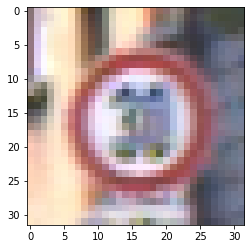

In [ ]:
plt.imshow(test["features"][100])